In [42]:
# !pip install numpy pandas matplotlib scikit-learn tensorflow keras

In [43]:
import numpy as np                  # Biblioteca para manipulação de arrays e operações matemáticas eficientes.
import pandas as pd                 # Biblioteca para manipulação e análise de dados, especialmente útil para trabalhar com dados em tabelas (DataFrames).
import matplotlib.pyplot as plt     # Biblioteca para criar gráficos e visualizações de dados.
import tensorflow as tf             # Biblioteca para construir e treinar redes neurais e outros modelos de Machine Learning.
import sklearn                      # Biblioteca para tarefas de Machine Learning, incluindo pré-processamento de dados, modelos e métricas de avaliação.

from tensorflow.keras.models import Sequential                                  # Classe para criar um modelo sequencial (camada a camada) de rede neural.
from tensorflow.keras.layers import Dense, Dropout, LSTM                        # Importa camadas para a rede neural. Dense cria uma camada totalmente conectada, Dropout ajuda a prevenir overfitting, e LSTM é uma camada recorrente utilizada para processamento de sequências (útil em séries temporais).
from sklearn.preprocessing import MinMaxScaler                                  # Classe para normalizar os dados, escalando-os para um intervalo entre 0 e 1, útil para melhorar o desempenho dos modelos.
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score   # Importa as funções mean_absolute_error (MAE): Erro Médio Absoluto, média dos erros absolutos.
                                                                                # mean_squared_error (MSE): Erro Quadrático Médio, média dos erros ao quadrado.
                                                                                # r2_score (R²): Coeficiente de Determinação, mede a qualidade do ajuste do modelo.

import os

## Carregando os dados e colocando a coluna 'Date' como índice

In [44]:
caminho_pasta = 'Base_dados'
lista_arquivos = [arquivo for arquivo in os.listdir(caminho_pasta) if os.path.isfile(os.path.join(caminho_pasta, arquivo))]

# for arq in lista_arquivos:
#     df = pd.read_csv(f'Base_dados/{arq}', parse_dates=['Date'])
#     df = df.sort_values('Date')
#     # Verificar se a coluna 'Date' existe e definir como índice
#     # if 'Date' in df.columns:
#     #     df = df.set_index('Date')
#     print(df.head())

df = pd.read_csv(f'Base_dados/hist_PETR4', parse_dates=['Date'])
df = df.sort_values('Date')

# df.head(5)
df



,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10,RSI_10,MACD,MACD_Histogram,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,stoch_k,stoch_d
0,2020-01-29,29.000000,29.080000,28.670000,28.850000,9.981384,42297500.0,29.291,29.236263,37.600867,-0.471141,-0.126467,28.402096,29.8305,31.258904,9.576805,0.156785,0.657606,30.839083,26.644553
1,2020-01-30,28.280001,29.040001,28.180000,28.940001,10.012522,44266800.0,29.233,29.182397,39.395227,-0.466857,-0.097746,28.322375,29.7425,31.162625,9.549465,0.217455,0.676312,42.306278,32.517223
2,2020-01-31,28.629999,28.840000,28.309999,28.450001,9.842997,55446700.0,29.093,29.049234,33.557649,-0.497268,-0.102526,28.155640,29.6425,31.129361,10.031951,0.098987,0.672119,39.537936,37.561099
3,2020-02-03,28.520000,28.730000,28.160000,28.180000,9.749582,39452800.0,28.911,28.891192,30.766439,-0.536966,-0.113779,27.995495,29.5110,31.026505,10.270780,0.060872,0.663049,32.334063,38.059426
4,2020-02-04,28.650000,29.040001,28.559999,28.629999,9.905270,57658400.0,28.812,28.843702,40.007140,-0.526052,-0.082292,27.948019,29.4080,30.867981,9.929139,0.233558,0.680244,30.164604,34.012201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1158,2024-09-23,36.389999,36.959999,36.220001,36.630001,36.630001,28218500.0,36.775,36.844576,40.979041,-0.418070,-0.180857,35.527039,37.7485,39.969961,11.769798,0.248251,0.771250,10.002693,6.438684
1159,2024-09-24,37.230000,37.310001,36.720001,36.779999,36.779999,35104100.0,36.720,36.832834,43.528431,-0.401144,-0.131145,35.458847,37.6355,39.812153,11.567019,0.303482,0.764732,17.164360,10.206673
1160,2024-09-25,37.099998,37.430000,36.959999,37.049999,37.049999,38655300.0,36.696,36.872319,48.019102,-0.361773,-0.073419,35.515639,37.5080,39.500361,10.623661,0.385061,0.756537,28.667630,18.611561
1161,2024-09-26,36.919998,36.919998,35.970001,36.250000,36.250000,58048200.0,36.634,36.759170,38.056137,-0.390622,-0.081815,35.475912,37.3540,39.232088,10.055619,0.206084,0.779642,26.211454,24.014481


In [113]:
lista_arquivos

['hist_BBAS3',
 'hist_EA',
 'hist_NFLX',
 'hist_NVDA',
 'hist_PETR4',
 'hist_TAEE11',
 'hist_TSLA']

## Dividindo Base (70% 30%)

In [45]:
# Calcular o índice para dividir a base
tot_linhas = len(df)
indice_divisao = int(tot_linhas * 0.7)

# Dividir a base de dados
base_70 = df.iloc[:indice_divisao]
base_30 = df.iloc[indice_divisao:]

# Opcional: Salvar os primeiros 70% em outro arquivo CSV
base_70.to_csv('Bases_Rede/PETR4_Training.csv', index=False)

# Salvar os últimos 30% em um novo arquivo CSV
base_30.to_csv('Bases_Rede/PETR4_Test.csv', index=False)

print("Base dividida e arquivos salvos com sucesso.")

Base dividida e arquivos salvos com sucesso.


In [46]:
base_30.isnull().sum()

Date              0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
SMA_10            0
EMA_10            0
RSI_10            0
MACD              0
MACD_Histogram    0
BBL_20_2.0        0
BBM_20_2.0        0
BBU_20_2.0        0
BBB_20_2.0        0
BBP_20_2.0        0
ATRr_14           0
stoch_k           0
stoch_d           0
dtype: int64

In [47]:
base = pd.read_csv('Bases_Rede/PETR4_Training.csv')
base

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10,RSI_10,MACD,MACD_Histogram,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,stoch_k,stoch_d
0,2020-01-29,29.000000,29.080000,28.670000,28.850000,9.981384,42297500.0,29.291,29.236263,37.600867,-0.471141,-0.126467,28.402096,29.8305,31.258904,9.576805,0.156785,0.657606,30.839083,26.644553
1,2020-01-30,28.280001,29.040001,28.180000,28.940001,10.012522,44266800.0,29.233,29.182397,39.395227,-0.466857,-0.097746,28.322375,29.7425,31.162625,9.549465,0.217455,0.676312,42.306278,32.517223
2,2020-01-31,28.629999,28.840000,28.309999,28.450001,9.842997,55446700.0,29.093,29.049234,33.557649,-0.497268,-0.102526,28.155640,29.6425,31.129361,10.031951,0.098987,0.672119,39.537936,37.561099
3,2020-02-03,28.520000,28.730000,28.160000,28.180000,9.749582,39452800.0,28.911,28.891192,30.766439,-0.536966,-0.113779,27.995495,29.5110,31.026505,10.270780,0.060872,0.663049,32.334063,38.059426
4,2020-02-04,28.650000,29.040001,28.559999,28.629999,9.905270,57658400.0,28.812,28.843702,40.007140,-0.526052,-0.082292,27.948019,29.4080,30.867981,9.929139,0.233558,0.680244,30.164604,34.012201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,2023-05-04,22.889999,23.379999,22.610001,23.020000,17.642166,57854400.0,25.246,24.517120,32.001024,-0.262084,-0.468899,22.319834,25.3765,28.433167,24.090529,0.114531,0.928847,6.053962,12.220554
810,2023-05-05,23.299999,24.170000,23.180000,24.000000,18.393221,83365200.0,24.995,24.423098,42.765012,-0.296646,-0.402769,22.284597,25.3630,28.441403,24.274752,0.278619,0.944644,15.512819,9.292004
811,2023-05-08,24.450001,24.629999,24.209999,24.510000,18.784075,59352300.0,24.777,24.438899,47.564534,-0.279659,-0.308626,22.302353,25.3710,28.439647,24.190195,0.359710,0.922169,27.371794,16.312858
812,2023-05-09,24.410000,24.799999,24.240000,24.590000,18.845385,33978200.0,24.516,24.466372,48.319864,-0.256783,-0.228599,22.374087,25.4005,28.426914,23.829558,0.366096,0.896300,37.435893,26.773502


In [48]:
# Coluna "OPEN" será utilizada para realizar as previsões

# A função '.iloc' é usada para selecionar linhas e colunas do DataFrame utilizando índices numéricos. Ela permite realizar uma seleção baseada na posição (índice) das linhas e colunas.
# Este primeiro ':' indica que estamos selecionando todas as linhas do DataFrame.
# 1:2 - Este é um intervalo de seleção de colunas. Significa que estamos selecionando a coluna na posição 1. Em pandas, os índices são baseados em zero, então a coluna 1 é a segunda coluna do DataFrame.
# Note que 1:2 seleciona colunas entre os índices 1 e 2, mas o intervalo em pandas é exclusivo na posição final, ou seja, ele pega apenas a coluna 1. Se quisesse incluir mais colunas, o índice final seria aumentado.
# O atributo .values converte o DataFrame ou Series resultante em um array do NumPy

base_treinamento = base.iloc[:, 1:2].values
base_treinamento

array([[29.        ],
       [28.28000069],
       [28.62999916],
       [28.52000046],
       [28.64999962],
       [29.04999924],
       [28.70000076],
       [29.        ],
       [28.88999939],
       [29.39999962],
       [29.63999939],
       [29.77000046],
       [29.86000061],
       [29.62999916],
       [29.05999947],
       [29.87000084],
       [30.79999924],
       [29.51000023],
       [27.04000092],
       [25.71999931],
       [25.15999985],
       [25.5       ],
       [26.56999969],
       [26.90999985],
       [26.32999992],
       [24.10000038],
       [17.80999947],
       [18.64999962],
       [16.70000076],
       [13.65999985],
       [15.10000038],
       [12.90999985],
       [13.60000038],
       [11.78999996],
       [11.06999969],
       [13.10999966],
       [12.10999966],
       [12.56999969],
       [13.23999977],
       [14.39999962],
       [13.30000019],
       [13.14999962],
       [13.60000038],
       [13.44999981],
       [15.39999962],
       [16

In [49]:
# Pré-Processamento - Normalizar valores, para diminuir a escala desses valores (0 a 1), para o treinamento ser mais rapido.

# 'MinMaxScaler' É uma classe do módulo sklearn.preprocessing que normaliza os dados, escalando-os para ficarem dentro de um determinado intervalo. Por padrão, este intervalo é de 0 a 1, mas pode ser ajustado.
# feature_range=(0, 1): Este argumento define o intervalo para o qual os dados serão escalados. Isso significa que o valor mais baixo no conjunto de dados se tornará 0 e o valor mais alto se tornará 1, enquanto os outros valores serão transformados proporcionalmente para estarem dentro desse intervalo.

# fit: Calcula as estatísticas necessárias (o valor mínimo e o valor máximo, neste caso) a partir dos dados fornecidos (base_treinamento).
# transform: Transforma os dados originais para a escala especificada (0 a 1), aplicando a fórmula de normalização: x_normalizado = x - xmin / xmax - xmin

normalizador = MinMaxScaler(feature_range=(0, 1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)
base_treinamento_normalizada

array([[0.67456731],
       [0.6474793 ],
       [0.66064704],
       [0.65650864],
       [0.6613995 ],
       [0.67644839],
       [0.66328066],
       [0.67456731],
       [0.67042884],
       [0.6896162 ],
       [0.69864554],
       [0.70353647],
       [0.70692248],
       [0.69826931],
       [0.67682462],
       [0.70729872],
       [0.74228737],
       [0.69375468],
       [0.60082769],
       [0.55116624],
       [0.53009779],
       [0.54288936],
       [0.58314518],
       [0.59593676],
       [0.57411585],
       [0.4902182 ],
       [0.25357409],
       [0.2851768 ],
       [0.21181342],
       [0.09744168],
       [0.15161777],
       [0.06922498],
       [0.09518437],
       [0.02708804],
       [0.        ],
       [0.07674943],
       [0.03912716],
       [0.0564334 ],
       [0.08164033],
       [0.12528216],
       [0.08389768],
       [0.07825432],
       [0.09518437],
       [0.08954101],
       [0.16290443],
       [0.19676445],
       [0.18735889],
       [0.208

In [50]:
base_treinamento_normalizada.shape
# len(base_treinamento_normalizada)

(814, 1)

In [51]:
X = [] # Previsores
y = [] # Preços Reais

for i in range(90, len(base_treinamento_normalizada)):  # 90 Preços Anteriores para prever o preço atual. Ou seja o preço da ação atual sera definido por meio dos três meses anteriores
    X.append(base_treinamento_normalizada[i - 90:i, 0]) # i - 90:i indica que estamos pegando os valores do índice i-90 até o índice i-1 (não inclui i). Ou seja, estamos pegando uma janela de 90 valores consecutivos.
                                                        # , 0 seleciona a coluna 0 do array (base_treinamento_normalizada), pois ele tem apenas uma coluna de dados.
                                                        # Cada elemento adicionado a X será, portanto, uma sequência de 90 valores consecutivos, representando os 90 dias anteriores.
    y.append(base_treinamento_normalizada[i, 0])        # base_treinamento_normalizada[i, 0] seleciona o valor no índice i, coluna 0.
                                                        # Esse valor é o valor real do próximo dia que queremos prever com base na janela de 90 dias anterior. Ou seja, o valor de y correspondente é aquele que vem imediatamente depois da janela que acabamos de adicionar a X.

X, y = np.array(X), np.array(y)

In [52]:
print(X.shape)
print(y.shape)

(724, 90)
(724,)


In [53]:
X[0], y[0] # Com base no primeiro índice (90 valores) da lista X, vamos precisar chegar no valor real de primeiro índice de Y

(array([0.67456731, 0.6474793 , 0.66064704, 0.65650864, 0.6613995 ,
        0.67644839, 0.66328066, 0.67456731, 0.67042884, 0.6896162 ,
        0.69864554, 0.70353647, 0.70692248, 0.69826931, 0.67682462,
        0.70729872, 0.74228737, 0.69375468, 0.60082769, 0.55116624,
        0.53009779, 0.54288936, 0.58314518, 0.59593676, 0.57411585,
        0.4902182 , 0.25357409, 0.2851768 , 0.21181342, 0.09744168,
        0.15161777, 0.06922498, 0.09518437, 0.02708804, 0.        ,
        0.07674943, 0.03912716, 0.0564334 , 0.08164033, 0.12528216,
        0.08389768, 0.07825432, 0.09518437, 0.08954101, 0.16290443,
        0.19676445, 0.18735889, 0.20842741, 0.20428894, 0.25846503,
        0.21632805, 0.22385253, 0.18698273, 0.21068473, 0.17607223,
        0.1659142 , 0.17983448, 0.23062455, 0.21143719, 0.1907449 ,
        0.224605  , 0.25319786, 0.25996988, 0.23927766, 0.2569601 ,
        0.25583148, 0.25131677, 0.25094054, 0.27200899, 0.28066217,
        0.27050414, 0.23814896, 0.26034611, 0.26

## Estrutura da Rede Neural Recorrente

In [54]:
regressor = Sequential() # Composta por uma sequencia de camadas

# 1° Camada de LSTM
regressor.add(LSTM(units=100, return_sequences=True, input_shape = (X.shape[1], 1)))    # units=100: Esta camada tem 100 neurônios, que são responsáveis por aprender as dependências temporais dos dados.
                                                                                        # return_sequences=True: Mantém a saída de cada timestep, o que permite que a próxima camada LSTM também receba uma sequência como entrada. Isso é importante ao empilhar camadas LSTM.
                                                                                        # input_shape=(X.shape[1], 1): Define a forma dos dados de entrada, sendo X.shape[1] o número de timesteps e 1 o número de características (ou features) por timestep.
regressor.add(Dropout(0.3)) # Aplica um Dropout de 30% para evitar overfitting. Durante o treinamento, essa camada irá aleatoriamente "desligar" 30% dos neurônios, ajudando o modelo a generalizar melhor e a não depender de neurônios específicos.

# 2° Camada de LSTM
regressor.add(LSTM(units=50, return_sequences=True))    # units=50: Agora a camada tem 50 neurônios, para reduzir a complexidade do modelo.
                                                        # return_sequences=True: Como estamos empilhando mais uma camada LSTM, precisamos que esta camada também retorne uma sequência completa.
regressor.add(Dropout(0.3))

# 3° Camada de LSTM
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.3))

# 4° e Última Camada de LSTM
regressor.add(LSTM(units=50))   # Esta é a última camada LSTM.
                                # return_sequences=False (padrão): Aqui não utilizamos return_sequences=True, pois não vamos empilhar mais camadas LSTM. O objetivo é produzir apenas o último valor da sequência, representando a informação captada por todas as unidades temporais anteriores.
regressor.add(Dropout(0.3)) # Aplica Dropout de 30% após a última camada LSTM, ajudando a garantir que o modelo não aprenda dependências específicas de forma muito rígida.

# Camada Dense (Totalmente Conectada)
regressor.add(Dense(units=1, activation = 'linear'))    # units=1: Esta camada densa tem uma unidade de saída, que é o valor que estamos prevendo (por exemplo, o próximo valor de uma série temporal).
                                                        # activation='linear': Usa uma função de ativação linear, o que é apropriado para problemas de regressão, onde estamos tentando prever um valor contínuo.

regressor.summary() # Total params = Quantidade de PESOS que serão ajustados durante o treinamento


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 90, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 90, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 90, 50)            30200     
                                                                 
 dropout_1 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 90, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 90, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                

In [55]:
# Definindo qual otimizador, qual função de perda e quais métricas serão usadas para treinar e avaliar o modelo.
# .compile() é usado para configurar o aprendizado do modelo. Aqui, definimos as configurações que o modelo usará ao ser treinado. No caso, estamos configurando o otimizador, a função de perda e as métricas de avaliação.
# optimizer= Otimizador é o algoritmo que ajusta os pesos do modelo com base na função de perda durante o treinamento, com o objetivo de minimizar o erro. 
    # 'rmsprop' é um otimizador popular, derivado de uma técnica chamada Root Mean Square Propagation. 
        # RMSprop ajusta a taxa de aprendizado de cada parâmetro de forma independente e é útil para séries temporais e outros problemas onde precisamos de um controle de taxa de aprendizado dinâmico e eficiente.
        # É uma escolha comum para redes LSTM, pois lida bem com oscilação de gradientes e divergência em problemas de séries temporais.
# loss='mean_squared_error' A função de perda é a métrica que o modelo tenta minimizar durante o treinamento. Ela mede o erro entre as previsões do modelo e os valores reais.
    # 'mean_squared_error' (MSE) calcula a média dos quadrados dos erros
    # Essa função é bastante usada em problemas de regressão, pois fornece uma boa estimativa do erro médio.

# metrics=['mean_absolute_error'] Métricas são usadas para monitorar o desempenho do modelo durante o treinamento e a avaliação. Elas não afetam diretamente o treinamento, mas ajudam a entender o progresso.
    # 'mean_absolute_error' (MAE) calcula a média dos valores absolutos dos erros
    # É uma boa métrica para se ter uma noção de como, em média, o modelo está se saindo em termos de previsão.

regressor.compile(optimizer= 'rmsprop', loss= 'mean_squared_error', metrics= ['mean_absolute_error'])

In [106]:
%%time
# Treinamento
# O método .fit() é utilizado para ajustar os pesos do modelo aos dados fornecidos, ou seja, é a fase de treinamento onde o modelo aprende a prever a saída correta a partir dos dados de entrada.
    # Ele faz com que o modelo ajuste seus pesos usando o otimizador e a função de perda que configuramos anteriormente (rmsprop e mean_squared_error).
    # Neste caso, estamos usando o X como entrada (previsores) e o y como saída esperada (alvo).
# X = Dados de entrada que alimentam o modelo. Neste exemplo, X contém sequências (janelas) de 90 dias, usadas para fazer previsões.
# y = Rótulos de saída (ou valores reais). y contém os valores reais que queremos prever — ou seja, o próximo valor após a janela de 90 dias, que estamos usando como entrada.
# epochs=100: Épocas são o número de vezes que o algoritmo de aprendizado percorrerá todo o conjunto de dados.
    # Aqui, estamos definindo 100 épocas, o que significa que o modelo verá todo o conjunto de dados 100 vezes durante o treinamento.
    # Mais épocas podem levar a um modelo mais preciso, desde que não cause overfitting (quando o modelo começa a "memorizar" em vez de "generalizar").
# batch_size=32: Tamanho do lote indica quantas amostras de treinamento são processadas antes de o modelo atualizar os pesos.
    # Aqui, estamos usando um batch_size de 32, o que significa que o modelo vai treinar com 32 amostras de cada vez antes de ajustar seus pesos (fazer uma atualização de gradiente).
    # Utilizar um tamanho de lote menor pode tornar o treinamento mais estável, mas também mais demorado. Já lotes maiores tornam o treinamento mais rápido, mas podem levar a uma convergência menos precisa.

for i in range(0, 5):
    print(f"Treinamento {i+1}/5")
    regressor.fit(X, y, epochs= 100, batch_size = 32)
# regressor.fit(X, y, epochs= 100, batch_size = 32)
# ex: mean_absolute_error: 01305 = indica que a rede neural está errando em torno de 13% as previsões

Treinamento 1/5
Epoch 1/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0034 - mean_absolute_error: 0.0447
Epoch 2/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0034 - mean_absolute_error: 0.0444
Epoch 3/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0034 - mean_absolute_error: 0.0440
Epoch 4/100
23/23 [==============================] - 2s 93ms/step - loss: 0.0037 - mean_absolute_error: 0.0453
Epoch 5/100
23/23 [==============================] - 2s 94ms/step - loss: 0.0031 - mean_absolute_error: 0.0424
Epoch 6/100
23/23 [==============================] - 2s 100ms/step - loss: 0.0029 - mean_absolute_error: 0.0411
Epoch 7/100
23/23 [==============================] - 2s 97ms/step - loss: 0.0034 - mean_absolute_error: 0.0439
Epoch 8/100
23/23 [==============================] - 2s 96ms/step - loss: 0.0030 - mean_absolute_error: 0.0426
Epoch 9/100
23/23 [==============================] - 2s 96ms/step - loss: 0.0029 - mean_absolut

## Previsões dos Preços das Ações

In [57]:
base_teste = pd.read_csv('Bases_Rede/PETR4_Test.csv')
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume,SMA_10,EMA_10,RSI_10,MACD,MACD_Histogram,BBL_20_2.0,BBM_20_2.0,BBU_20_2.0,BBB_20_2.0,BBP_20_2.0,ATRr_14,stoch_k,stoch_d
0,2023-05-11,24.129999,25.480000,23.930000,25.430000,19.489149,136878100.0,24.128,24.651042,56.371813,-0.153596,-0.066324,22.367022,25.3900,28.412979,23.812355,0.506616,0.916044,47.506061,42.031598
1,2023-05-12,25.580000,26.740000,25.480000,26.250000,20.117584,117237500.0,24.143,24.941762,62.618333,-0.018173,0.055279,22.369869,25.4100,28.450132,23.928622,0.638152,0.944184,58.727040,49.128647
2,2023-05-15,26.059999,26.150000,25.400000,25.660000,19.665419,81996700.0,24.339,25.072351,56.186977,0.041069,0.091617,22.362201,25.3915,28.420799,23.860730,0.544317,0.937457,66.141733,57.458278
3,2023-05-16,26.110001,27.030001,26.080000,26.299999,20.155901,117782700.0,24.695,25.295559,61.013162,0.138070,0.150894,22.362201,25.3915,28.420799,23.860730,0.649952,0.968353,73.335518,66.068097
4,2023-05-17,26.600000,26.760000,25.510000,25.660000,19.665419,107129200.0,24.995,25.361821,54.359869,0.161440,0.139411,22.367072,25.3390,28.310928,23.457342,0.554005,0.988470,70.893357,70.123536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,2024-09-23,36.389999,36.959999,36.220001,36.630001,36.630001,28218500.0,36.775,36.844576,40.979041,-0.418070,-0.180857,35.527039,37.7485,39.969961,11.769798,0.248251,0.771250,10.002693,6.438684
345,2024-09-24,37.230000,37.310001,36.720001,36.779999,36.779999,35104100.0,36.720,36.832834,43.528431,-0.401144,-0.131145,35.458847,37.6355,39.812153,11.567019,0.303482,0.764732,17.164360,10.206673
346,2024-09-25,37.099998,37.430000,36.959999,37.049999,37.049999,38655300.0,36.696,36.872319,48.019102,-0.361773,-0.073419,35.515639,37.5080,39.500361,10.623661,0.385061,0.756537,28.667630,18.611561
347,2024-09-26,36.919998,36.919998,35.970001,36.250000,36.250000,58048200.0,36.634,36.759170,38.056137,-0.390622,-0.081815,35.475912,37.3540,39.232088,10.055619,0.206084,0.779642,26.211454,24.014481


In [58]:
base_teste.shape

(349, 20)

In [59]:
y_teste = base_teste.iloc[:, 1:2].values # Preços Reais

In [60]:
y_teste

array([[24.12999916],
       [25.57999992],
       [26.05999947],
       [26.11000061],
       [26.60000038],
       [25.59000015],
       [26.07999992],
       [25.87999916],
       [25.64999962],
       [26.25      ],
       [26.79999924],
       [26.80999947],
       [26.75      ],
       [26.71999931],
       [26.27000046],
       [26.29999924],
       [27.43000031],
       [27.54000092],
       [27.45000076],
       [28.64999962],
       [29.10000038],
       [30.21999931],
       [29.23999977],
       [28.94000053],
       [30.20000076],
       [29.22999954],
       [29.62999916],
       [30.29999924],
       [30.93000031],
       [31.45999908],
       [31.20000076],
       [30.12000084],
       [30.93000031],
       [30.57999992],
       [31.        ],
       [31.        ],
       [29.71999931],
       [29.95999908],
       [30.15999985],
       [29.85000038],
       [29.76000023],
       [29.11000061],
       [29.53000069],
       [29.20000076],
       [29.06999969],
       [29

In [61]:
# Juntando as duas bases em uma só
base_completa = pd.concat((base['Open'], base_teste['Open']), axis= 0) # axis=0 indica que a concatenação será feita ao longo do eixo 0, ou seja, ao longo das linhas (verticalmente). Isso significa que a Série base['Open'] será empilhada sobre a Série base_teste['Open'].

In [62]:
base_completa

0      29.000000
1      28.280001
2      28.629999
3      28.520000
4      28.650000
         ...    
344    36.389999
345    37.230000
346    37.099998
347    36.919998
348    36.380001
Name: Open, Length: 1163, dtype: float64

In [63]:
len(base_completa) - len(base_teste) - 90

724

In [64]:
# vai receber os valores do índice resultante da conta feita, em diante, no caso do índice 724 até o final
entradas = base_completa[ len(base_completa) - len(base_teste) - 90: ].values

In [65]:
entradas

array([25.10000038, 24.98999977, 23.54000092, 22.94000053, 21.95999908,
       23.34000015, 23.94000053, 23.5       , 23.95000076, 24.14999962,
       24.29000092, 24.44000053, 24.40999985, 24.11000061, 25.84000015,
       25.        , 25.88999939, 26.27000046, 27.46999931, 26.54999924,
       27.09000015, 26.18000031, 25.85000038, 25.62999916, 26.06999969,
       25.51000023, 24.54000092, 24.87000084, 25.90999985, 25.79999924,
       26.04999924, 25.97999954, 26.69000053, 26.85000038, 26.57999992,
       26.60000038, 26.67000008, 26.        , 25.77000046, 26.67000008,
       25.84000015, 26.20999908, 25.30999947, 25.42000008, 24.82999992,
       25.70000076, 25.71999931, 25.14999962, 25.35000038, 25.15999985,
       24.54999924, 24.28000069, 23.32999992, 23.39999962, 23.10000038,
       23.51000023, 23.20000076, 23.38999939, 23.37000084, 22.70999908,
       23.11000061, 23.21999931, 23.70999908, 24.25      , 24.        ,
       24.09000015, 24.62999916, 24.19000053, 24.34000015, 24.03

In [66]:
entradas.shape

(439,)

In [67]:
# Atualmente 'entradas' é um Vetor, para usar na Rede Neural, precisa ser uma Matriz
# .reshape(-1, 1):A função .reshape() do NumPy é usada para alterar a forma (dimensões) de um array.
    # O -1 aqui indica que o NumPy deve calcular automaticamente o número de linhas que o array deve ter, com base na outra dimensão especificada.
        # Ele faz isso garantindo que o número total de elementos seja o mesmo antes e depois da reestruturação.
    # O 1 indica que o array deve ter uma única coluna.
entradas_novo = entradas.reshape(-1, 1)
entradas_novo.shape

(439, 1)

In [68]:
entradas_novo

array([[25.10000038],
       [24.98999977],
       [23.54000092],
       [22.94000053],
       [21.95999908],
       [23.34000015],
       [23.94000053],
       [23.5       ],
       [23.95000076],
       [24.14999962],
       [24.29000092],
       [24.44000053],
       [24.40999985],
       [24.11000061],
       [25.84000015],
       [25.        ],
       [25.88999939],
       [26.27000046],
       [27.46999931],
       [26.54999924],
       [27.09000015],
       [26.18000031],
       [25.85000038],
       [25.62999916],
       [26.06999969],
       [25.51000023],
       [24.54000092],
       [24.87000084],
       [25.90999985],
       [25.79999924],
       [26.04999924],
       [25.97999954],
       [26.69000053],
       [26.85000038],
       [26.57999992],
       [26.60000038],
       [26.67000008],
       [26.        ],
       [25.77000046],
       [26.67000008],
       [25.84000015],
       [26.20999908],
       [25.30999947],
       [25.42000008],
       [24.82999992],
       [25

In [69]:
# Normalizar a variável 'entradas_novo'
entradas_novo = normalizador.transform(entradas_novo)

In [70]:
entradas_novo

array([[0.52784047],
       [0.523702  ],
       [0.46914975],
       [0.44657637],
       [0.4097065 ],
       [0.46162527],
       [0.48419864],
       [0.46764483],
       [0.48457488],
       [0.49209929],
       [0.49736645],
       [0.50300978],
       [0.50188108],
       [0.49059443],
       [0.55568094],
       [0.52407823],
       [0.55756203],
       [0.57185853],
       [0.61700521],
       [0.58239272],
       [0.60270878],
       [0.56847252],
       [0.55605717],
       [0.54778023],
       [0.56433405],
       [0.5432656 ],
       [0.50677202],
       [0.51918737],
       [0.55831449],
       [0.55417602],
       [0.56358158],
       [0.56094804],
       [0.58765989],
       [0.59367944],
       [0.58352141],
       [0.58427388],
       [0.58690742],
       [0.5617005 ],
       [0.55304739],
       [0.58690742],
       [0.55568094],
       [0.56960114],
       [0.53574111],
       [0.53987959],
       [0.51768244],
       [0.55041385],
       [0.55116624],
       [0.529

In [71]:
X_teste = [] # Previsores

for i in range(90, len(entradas_novo)):
    # i - 90:i:
    # Para cada valor de i, estamos criando uma janela de comprimento 90, terminando no índice i atual.
    # Por exemplo, quando i é 90, a fatia será de 0 a 90, ou seja, pegamos os 90 primeiros valores.
    # Quando i é 91, pegamos de 1 a 91, e assim por diante.
    # Desta forma, cada nova iteração move a janela uma posição para frente nos dados, criando diferentes "janelas deslizantes".
    # [:, 0] primeira coluna.
    X_teste.append(entradas_novo[i - 90:i, 0])

In [72]:
X_teste # Cada linha do array ( [array([...]) ] ) é os preços do dia x até 90 dias ou 3 meses depois. Ou seja, na primeira linha, são os preços do dia 10/05/2023 até 09/07/2023, segunda linha 11/05/2023 até 10/07/2023. Logo, vai do primeiro dia (10/2017) até o ultimo dia (01/2018)

[array([0.52784047, 0.523702  , 0.46914975, 0.44657637, 0.4097065 ,
        0.46162527, 0.48419864, 0.46764483, 0.48457488, 0.49209929,
        0.49736645, 0.50300978, 0.50188108, 0.49059443, 0.55568094,
        0.52407823, 0.55756203, 0.57185853, 0.61700521, 0.58239272,
        0.60270878, 0.56847252, 0.55605717, 0.54778023, 0.56433405,
        0.5432656 , 0.50677202, 0.51918737, 0.55831449, 0.55417602,
        0.56358158, 0.56094804, 0.58765989, 0.59367944, 0.58352141,
        0.58427388, 0.58690742, 0.5617005 , 0.55304739, 0.58690742,
        0.55568094, 0.56960114, 0.53574111, 0.53987959, 0.51768244,
        0.55041385, 0.55116624, 0.52972156, 0.53724604, 0.53009779,
        0.50714818, 0.49699022, 0.46124904, 0.46388258, 0.45259593,
        0.46802106, 0.45635817, 0.46350635, 0.46275396, 0.4379232 ,
        0.45297216, 0.45711056, 0.47554547, 0.49586153, 0.48645596,
        0.48984197, 0.51015796, 0.49360421, 0.49924754, 0.48758465,
        0.51279158, 0.56094804, 0.55605717, 0.55

In [73]:
X_teste = np.array(X_teste)
X_teste = np.reshape(X_teste, (X_teste.shape[0], X_teste.shape[1], 1))

In [74]:
X_teste.shape

(349, 90, 1)

In [75]:
previsoes = regressor.predict(X_teste)

11/11 [==============================] - 2s 35ms/step


In [76]:
previsoes

array([[0.47365978],
       [0.49169827],
       [0.5112906 ],
       [0.5325094 ],
       [0.5528933 ],
       [0.57116985],
       [0.5817731 ],
       [0.5851037 ],
       [0.5827167 ],
       [0.57617736],
       [0.57005244],
       [0.56878203],
       [0.57270074],
       [0.5794154 ],
       [0.58622265],
       [0.58975387],
       [0.5894803 ],
       [0.5908708 ],
       [0.59626037],
       [0.6041385 ],
       [0.6165575 ],
       [0.6336292 ],
       [0.6562271 ],
       [0.6769705 ],
       [0.68968165],
       [0.69793475],
       [0.7006053 ],
       [0.69964683],
       [0.69961   ],
       [0.7043777 ],
       [0.71528995],
       [0.72861975],
       [0.73645735],
       [0.7394745 ],
       [0.738477  ],
       [0.7366304 ],
       [0.73570746],
       [0.73129904],
       [0.723717  ],
       [0.7160082 ],
       [0.7092635 ],
       [0.70386016],
       [0.6976974 ],
       [0.69231963],
       [0.6877832 ],
       [0.68379265],
       [0.68212765],
       [0.679

In [77]:
# Desnormalizador
previsoes = normalizador.inverse_transform(previsoes)

In [78]:
previsoes

array([[23.659878],
       [24.139341],
       [24.660105],
       [25.2241  ],
       [25.765903],
       [26.251696],
       [26.53353 ],
       [26.622059],
       [26.55861 ],
       [26.384794],
       [26.221994],
       [26.188227],
       [26.292387],
       [26.470861],
       [26.651798],
       [26.745659],
       [26.738386],
       [26.775349],
       [26.918604],
       [27.128002],
       [27.4581  ],
       [27.911865],
       [28.512518],
       [29.063877],
       [29.40174 ],
       [29.621107],
       [29.69209 ],
       [29.666615],
       [29.665634],
       [29.792362],
       [30.082407],
       [30.436716],
       [30.645037],
       [30.725235],
       [30.698719],
       [30.649637],
       [30.625107],
       [30.507929],
       [30.306398],
       [30.101498],
       [29.922226],
       [29.778605],
       [29.614798],
       [29.471857],
       [29.35128 ],
       [29.24521 ],
       [29.200956],
       [29.12003 ],
       [29.032875],
       [28.954578],


In [79]:
y_teste

array([[24.12999916],
       [25.57999992],
       [26.05999947],
       [26.11000061],
       [26.60000038],
       [25.59000015],
       [26.07999992],
       [25.87999916],
       [25.64999962],
       [26.25      ],
       [26.79999924],
       [26.80999947],
       [26.75      ],
       [26.71999931],
       [26.27000046],
       [26.29999924],
       [27.43000031],
       [27.54000092],
       [27.45000076],
       [28.64999962],
       [29.10000038],
       [30.21999931],
       [29.23999977],
       [28.94000053],
       [30.20000076],
       [29.22999954],
       [29.62999916],
       [30.29999924],
       [30.93000031],
       [31.45999908],
       [31.20000076],
       [30.12000084],
       [30.93000031],
       [30.57999992],
       [31.        ],
       [31.        ],
       [29.71999931],
       [29.95999908],
       [30.15999985],
       [29.85000038],
       [29.76000023],
       [29.11000061],
       [29.53000069],
       [29.20000076],
       [29.06999969],
       [29

In [80]:
previsoes.mean()

34.64637

In [81]:
y_teste.mean()

35.59676208605397

In [84]:
# Evitando divisão por zero: adicionar um valor pequeno onde y_teste é zero
y_teste2 = np.where(y_teste == 0, 1e-10, y_teste)  # Evitar problemas de divisão por zero
mape = np.mean(np.abs((y_teste - previsoes) / y_teste)) * 100
y_teste2

array([[24.12999916],
       [25.57999992],
       [26.05999947],
       [26.11000061],
       [26.60000038],
       [25.59000015],
       [26.07999992],
       [25.87999916],
       [25.64999962],
       [26.25      ],
       [26.79999924],
       [26.80999947],
       [26.75      ],
       [26.71999931],
       [26.27000046],
       [26.29999924],
       [27.43000031],
       [27.54000092],
       [27.45000076],
       [28.64999962],
       [29.10000038],
       [30.21999931],
       [29.23999977],
       [28.94000053],
       [30.20000076],
       [29.22999954],
       [29.62999916],
       [30.29999924],
       [30.93000031],
       [31.45999908],
       [31.20000076],
       [30.12000084],
       [30.93000031],
       [30.57999992],
       [31.        ],
       [31.        ],
       [29.71999931],
       [29.95999908],
       [30.15999985],
       [29.85000038],
       [29.76000023],
       [29.11000061],
       [29.53000069],
       [29.20000076],
       [29.06999969],
       [29

In [107]:
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_teste, previsoes)
print(f"{'Erro Médio Absoluto - Mean Absolute Error (MAE):':<72} {mae}")

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_teste, previsoes)
print(f"{'Erro Quadrático Médio - Mean Squared Error (MSE):':<72} {mse}")

# 3. R² Score (Coeficiente de Determinação)
r2 = r2_score(y_teste, previsoes)
print(f"{'Coeficiente de Determinação - R² Score:':<72} {r2}")

# 4. Mean Absolute Percentage Error (MAPE)
# Evitando divisão por zero: adicionar um valor pequeno onde y_teste é zero
y_teste = np.where(y_teste == 0, 1e-10, y_teste)  # Evitar problemas de divisão por zero
mape = np.mean(np.abs((y_teste - previsoes) / y_teste)) * 100
print(f"{'Erro Percentual Absoluto Médio - Mean Absolute Percentage Error (MAPE):':<72} {mape:.2f}%")

# 5. Acurácia
# Definindo acurácia como o inverso do erro percentual (assumindo um certo limite para considerar previsões corretas)
acuracia = 100 - mape
print(f"{'Acurácia:':<72} {acuracia:.2f}%")

Erro Médio Absoluto - Mean Absolute Error (MAE):                         1.1572028326783272
Erro Quadrático Médio - Mean Squared Error (MSE):                        1.9363358668225317
Coeficiente de Determinação - R² Score:                                  0.8825005615931476
Erro Percentual Absoluto Médio - Mean Absolute Percentage Error (MAPE):  3.16%
Acurácia:                                                                96.84%


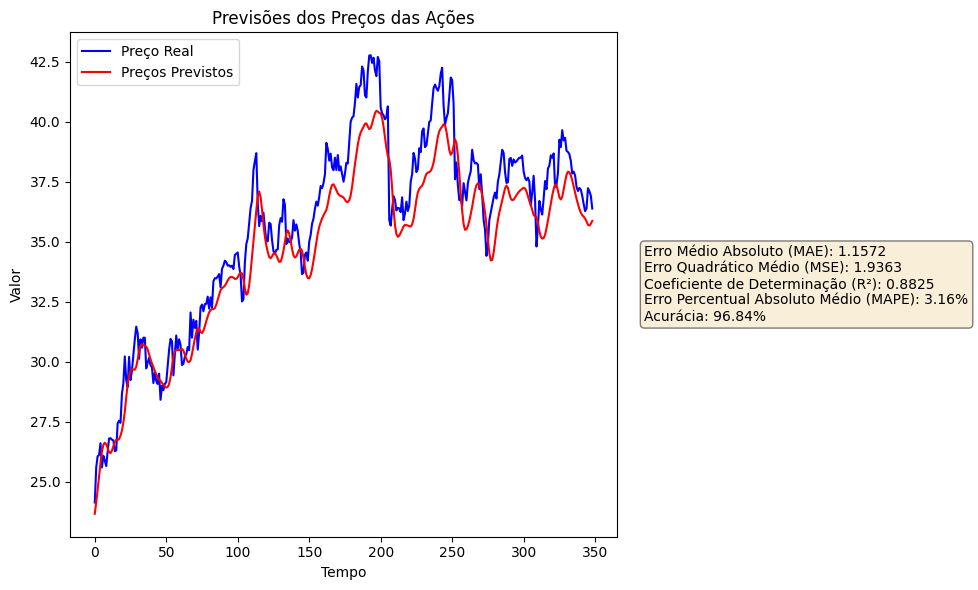

In [112]:
plt.figure(figsize=(10, 6))  # Ajuste a largura para 10 e altura para 6
plt.plot(y_teste, color= 'blue', label= 'Preço Real')
plt.plot(previsoes, color= 'red', label= 'Preços Previstos')
plt.title("Previsões dos Preços das Ações")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend(loc='upper left')  # Ajuste da posição da legenda para o canto superior esquerdo


# Adicionar texto com os indicadores
textstr = '\n'.join((
    f"Erro Médio Absoluto (MAE): {mae:.4f}",
    f"Erro Quadrático Médio (MSE): {mse:.4f}",
    f"Coeficiente de Determinação (R²): {r2:.4f}",
    f"Erro Percentual Absoluto Médio (MAPE): {mape:.2f}%",
    f"Acurácia: {acuracia:.2f}%"
))

# Definir a posição do texto no gráfico (mais ao lado para não sobrepor o gráfico)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.gca().text(1.05, 0.5, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='center', bbox=props)

# Ajuste o layout para que tudo fique bem visível
plt.tight_layout()
# Salvar o gráfico em um arquivo
plt.savefig(f'Bases_Rede/Previsao_PETR4.png', dpi=300, bbox_inches='tight')  # Salva a imagem com alta resolução
plt.show()


In [103]:
datas_teste = base_teste.iloc[:, 0:1].values

datas_teste

array([['2023-05-11'],
       ['2023-05-12'],
       ['2023-05-15'],
       ['2023-05-16'],
       ['2023-05-17'],
       ['2023-05-18'],
       ['2023-05-19'],
       ['2023-05-22'],
       ['2023-05-23'],
       ['2023-05-24'],
       ['2023-05-25'],
       ['2023-05-26'],
       ['2023-05-29'],
       ['2023-05-30'],
       ['2023-05-31'],
       ['2023-06-01'],
       ['2023-06-02'],
       ['2023-06-05'],
       ['2023-06-06'],
       ['2023-06-07'],
       ['2023-06-09'],
       ['2023-06-12'],
       ['2023-06-13'],
       ['2023-06-14'],
       ['2023-06-15'],
       ['2023-06-16'],
       ['2023-06-19'],
       ['2023-06-20'],
       ['2023-06-21'],
       ['2023-06-22'],
       ['2023-06-23'],
       ['2023-06-26'],
       ['2023-06-27'],
       ['2023-06-28'],
       ['2023-06-29'],
       ['2023-06-30'],
       ['2023-07-03'],
       ['2023-07-04'],
       ['2023-07-05'],
       ['2023-07-06'],
       ['2023-07-07'],
       ['2023-07-10'],
       ['2023-07-11'],
       ['20

In [104]:
# Salvando previsões e métricas em um arquivo CSV
resultados = pd.DataFrame({
    'Data': datas_teste.flatten(),
    'Preço Real': y_teste.flatten(),
    'Preços Previstos': previsoes.flatten()
    # 'Erro Absoluto': np.abs(y_teste.flatten() - previsoes.flatten()),
    # 'Erro Percentual': (np.abs(y_teste.flatten() - previsoes.flatten()) / y_teste.flatten()) * 100
})
resultados.to_csv('Bases_Rede/Resultado_Previsao.csv', index=False)

In [83]:
a = previsoes == y_teste
a

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [85]:
y_teste

array([[24.12999916],
       [25.57999992],
       [26.05999947],
       [26.11000061],
       [26.60000038],
       [25.59000015],
       [26.07999992],
       [25.87999916],
       [25.64999962],
       [26.25      ],
       [26.79999924],
       [26.80999947],
       [26.75      ],
       [26.71999931],
       [26.27000046],
       [26.29999924],
       [27.43000031],
       [27.54000092],
       [27.45000076],
       [28.64999962],
       [29.10000038],
       [30.21999931],
       [29.23999977],
       [28.94000053],
       [30.20000076],
       [29.22999954],
       [29.62999916],
       [30.29999924],
       [30.93000031],
       [31.45999908],
       [31.20000076],
       [30.12000084],
       [30.93000031],
       [30.57999992],
       [31.        ],
       [31.        ],
       [29.71999931],
       [29.95999908],
       [30.15999985],
       [29.85000038],
       [29.76000023],
       [29.11000061],
       [29.53000069],
       [29.20000076],
       [29.06999969],
       [29

In [86]:
y_teste2

array([[24.12999916],
       [25.57999992],
       [26.05999947],
       [26.11000061],
       [26.60000038],
       [25.59000015],
       [26.07999992],
       [25.87999916],
       [25.64999962],
       [26.25      ],
       [26.79999924],
       [26.80999947],
       [26.75      ],
       [26.71999931],
       [26.27000046],
       [26.29999924],
       [27.43000031],
       [27.54000092],
       [27.45000076],
       [28.64999962],
       [29.10000038],
       [30.21999931],
       [29.23999977],
       [28.94000053],
       [30.20000076],
       [29.22999954],
       [29.62999916],
       [30.29999924],
       [30.93000031],
       [31.45999908],
       [31.20000076],
       [30.12000084],
       [30.93000031],
       [30.57999992],
       [31.        ],
       [31.        ],
       [29.71999931],
       [29.95999908],
       [30.15999985],
       [29.85000038],
       [29.76000023],
       [29.11000061],
       [29.53000069],
       [29.20000076],
       [29.06999969],
       [29